In [157]:
# 1. prepare packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data=pd.read_csv('F:\\BaiduNetdiskDownload\\数据分析（数据资料）\\5、O2O_优惠券使用情况分析\\资料2\\ccf_offline_stage1_train.csv') # read the data

## 1. Data glance
### The data has 1,754,884 entries and 7 columns. For the 7 columns, there are two datetime type variables(date and date_received), three categorical variables( user_id, merchant_id,coupon_id), two continous variables(distance and discount_rate). However, it is worth noticing that this data has missing values as showing below.   
### Coupon_id        39.97%    Discount_rate    39.97%      Date_received    39.97%
### Date             55.72%

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   User_id        int64  
 1   Merchant_id    int64  
 2   Coupon_id      float64
 3   Discount_rate  object 
 4   Distance       float64
 5   Date_received  float64
 6   Date           float64
dtypes: float64(4), int64(2), object(1)
memory usage: 93.7+ MB


In [74]:
data.describe()

,User_id,Merchant_id,Coupon_id,Distance,Date_received,Date
count,1.754884e+06,1.754884e+06,1.053282e+06,1.648881e+06,1.053282e+06,7.769840e+05
mean,3.689255e+06,4.038808e+03,6.815398e+03,2.361636e+00,2.016032e+07,2.016040e+07
std,2.123428e+06,2.435963e+03,4.174276e+03,3.483974e+00,1.771416e+02,1.621500e+02
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.016010e+07,2.016010e+07
25%,1.845052e+06,1.983000e+03,2.840000e+03,0.000000e+00,2.016013e+07,2.016031e+07
50%,3.694446e+06,3.532000e+03,7.430000e+03,0.000000e+00,2.016032e+07,2.016042e+07
75%,5.528759e+06,6.329000e+03,1.032300e+04,3.000000e+00,2.016051e+07,2.016052e+07
max,7.361032e+06,8.856000e+03,1.404500e+04,1.000000e+01,2.016062e+07,2.016063e+07


In [75]:
null_value=data.isnull().sum()
null_value

User_id               0
Merchant_id           0
Coupon_id        701602
Discount_rate    701602
Distance         106003
Date_received    701602
Date             977900
dtype: int64

In [76]:
null_value=pd.DataFrame(null_value,columns=['null_count'])
null_value

,null_count
User_id,0
Merchant_id,0
Coupon_id,701602
Discount_rate,701602
Distance,106003
Date_received,701602
Date,977900


In [77]:
null_value['percentage']=null_value['null_count'].values/data.shape[0]*100
null_value['percentage']

User_id           0.000000
Merchant_id       0.000000
Coupon_id        39.979964
Discount_rate    39.979964
Distance          6.040456
Date_received    39.979964
Date             55.724481
Name: percentage, dtype: float64

In [78]:
null_value['null_count'].values

array([     0,      0, 701602, 701602, 106003, 701602, 977900],
      dtype=int64)

In [79]:
data.shape

(1754884, 7)

In [80]:
data.nunique()

User_id          539438
Merchant_id        8415
Coupon_id          9738
Discount_rate        45
Distance             11
Date_received       167
Date                182
dtype: int64

In [81]:
data.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN


In [82]:
data['Discount_rate'].value_counts(dropna=False)

NaN        701602
30:5       270712
100:10     182554
200:20     111046
20:5        91013
20:1        51705
50:5        47379
100:30      38196
200:30      29327
300:30      28979
50:10       28452
10:5        25925
0.95        20568
10:1        17842
30:1        17654
150:20      17437
100:20      14297
30:10       12692
50:20        8203
0.9          8085
200:50       5585
150:10       5325
100:5        5053
0.8          3441
50:1         3354
5:1          2526
100:50       1774
150:30        654
0.85          649
200:10        575
100:1         537
20:10         514
150:50        306
300:50        206
0.5           186
0.75          121
0.2           110
0.6            58
200:5          57
300:20         56
0.7            54
30:20          24
300:10         23
200:100        12
50:30           9
150:5           7
Name: Discount_rate, dtype: int64

<AxesSubplot:>

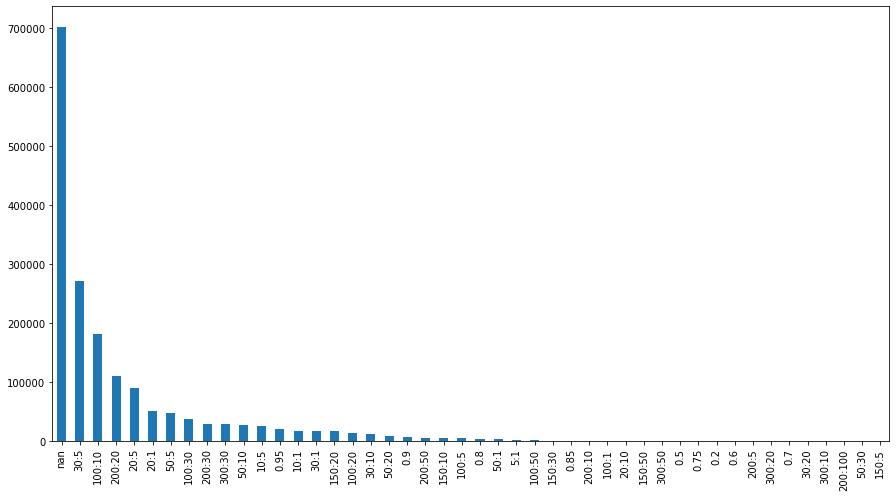

In [83]:
data['Discount_rate'].value_counts(dropna=False).plot.bar(figsize=(15,8))

In [84]:
data['Distance'].value_counts().sort_index()

0.0     826070
1.0     227221
2.0     118413
3.0      76598
4.0      55085
5.0      41452
6.0      32483
7.0      25681
8.0      21436
9.0      17958
10.0    206484
Name: Distance, dtype: int64

<AxesSubplot:>

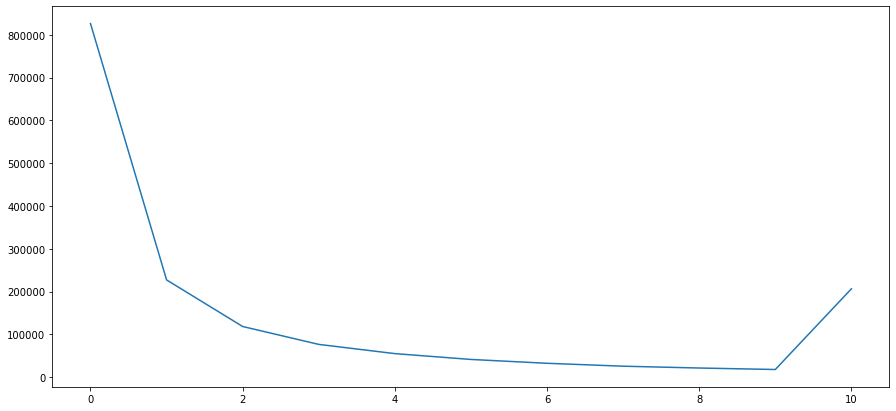

In [85]:
data['Distance'].value_counts().sort_index().plot(figsize=(15,7))

 ## 2. data preparation 
 ### Data cleaning, data type transfermation, data grouping

In [86]:
data['Date']=pd.to_datetime(data['Date'],format='%Y%m%d')
data['Date']

0         2016-02-17
1                NaT
2                NaT
3                NaT
4                NaT
             ...    
1754879   2016-03-22
1754880   2016-06-02
1754881   2016-03-21
1754882          NaT
1754883          NaT
Name: Date, Length: 1754884, dtype: datetime64[ns]

In [87]:
data['Date_received']=pd.to_datetime(data['Date_received'],format='%Y%m%d')
data['Date_received']

0                NaT
1         2016-05-28
2         2016-02-17
3         2016-03-19
4         2016-06-13
             ...    
1754879          NaT
1754880   2016-05-08
1754881          NaT
1754882   2016-06-13
1754883   2016-05-23
Name: Date_received, Length: 1754884, dtype: datetime64[ns]

In [88]:
print(f"This data starts from {data['Date'].min()}, and ends at {data['Date'].max()}")

This data starts from 2016-01-01 00:00:00, and ends at 2016-06-30 00:00:00


In [89]:
print(f"Customers receving coupons starts from {data['Date_received'].min()}, and ends at {data['Date_received'].max()}")

Customers receving coupons starts from 2016-01-01 00:00:00, and ends at 2016-06-15 00:00:00


<AxesSubplot:>

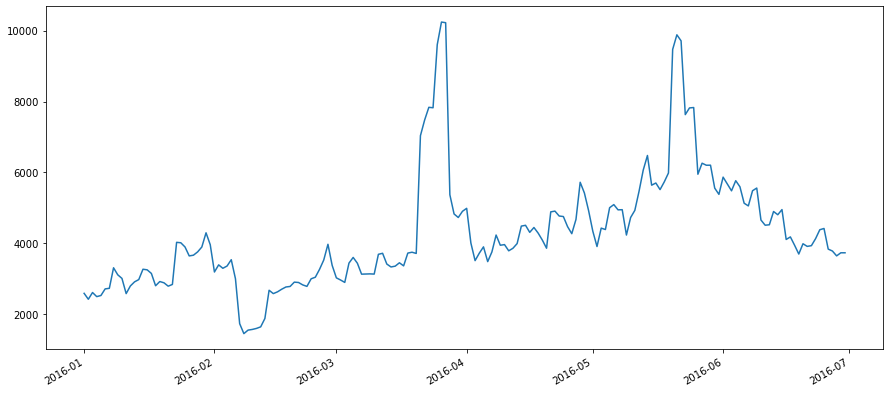

In [90]:
data['Date'].value_counts().plot(figsize=(15,7))

<AxesSubplot:>

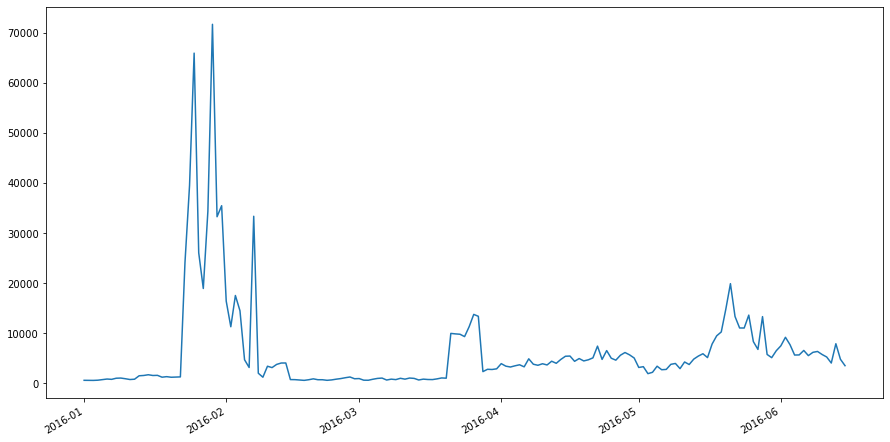

In [91]:
data['Date_received'].value_counts().plot(figsize=(15,8))

In [92]:
data.head(20)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT
5,1439408,2632,NaN,NaN,0.0,NaT,2016-05-16
6,1439408,2632,8591.0,20:1,0.0,2016-05-16,2016-06-13
7,1832624,3381,7610.0,200:20,0.0,2016-04-29,NaT
8,2029232,3381,11951.0,200:20,1.0,2016-01-29,NaT
9,2029232,450,1532.0,30:5,0.0,2016-05-30,NaT


In [93]:
data['Discount_rate']=data['Discount_rate'].fillna('null')
data.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,null,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT


###   caculate discount rate

In [94]:
def discount_rate_opt(s):
    if ':' in s:
        split=s.split(':')
        discount_rate=(int(split[0])-int(split[1]))/int(split[0])
        return round(discount_rate,2)
    elif s=='null':
        return np.NaN
    else:
        return float(s)

In [95]:
data['Discount_rate']=data['Discount_rate'].map(discount_rate_opt)
data.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,0.87,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,0.95,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,0.95,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,0.95,0.0,2016-06-13,NaT


### if Coupon_id equals null, it means no coupon was used in transaction. If so, consequencely, discount_rate and Date should be null as well

In [96]:
nan1=data['Coupon_id'].isnull() #identify whether the value of Coupon_id is null
nan2=data['Date_received'].isnull()  #identify whether the value of Date_received is null
np.all(nan1==nan2) # if result= True, it demonstrates that the relation between Coupon_id and Data_received occur synonymously

True

In [97]:
nan3=data['Discount_rate'].isnull() 
np.all(nan1==nan3)

True

## 3. four scenarios:
### If Date=null & Coupon_id!= null, customers with coupon but haven't redeemed(nor_cpon_no_consume)
### If Date=null & Coupon_id= null, customers don't have order who don't have coupon(nor_consume)
###  If Date!=null & Coupon_id =null, customers consumed but without a coupon(no_cpon_consume)
### Date!=null & Coupon_id!=null, customers redeemed their coupon for purchasing(cpon_consume)

In [98]:
cpon_no_consume=data[data['Date'].isnull() & data['Coupon_id'].notnull()]
cpon_no_consume.shape

(977900, 7)

In [99]:
nor_consume=data[data['Date'].isnull() & data['Coupon_id'].isnull()]
nor_consume.shape

(0, 7)

In [100]:
no_cpon_consume=data[data['Date'].notnull() & data['Coupon_id'].isnull()]
no_cpon_consume.shape

(701602, 7)

In [101]:
cpon_consume=data[data['Date'].notnull()& data['Coupon_id'].notnull()]
cpon_consume.shape

(75382, 7)

In [102]:
cpon_consume.shape[0]/(no_cpon_consume.shape[0]+cpon_consume.shape[0])

0.09701872882839287

In [103]:
cpon_consume.shape[0]/(cpon_consume.shape[0]+cpon_no_consume.shape[0])

0.07156867771404049

 ### Insight: coupon consumption accounts for 9.7% of total consumption. However, only 7.16 percent of coupons were redeemed 

In [104]:
consume_status_dict={'cpon_no_consume':len(cpon_no_consume),'cpon_consume':len(cpon_consume),'no_cpon_consume':len(no_cpon_consume)}
consume_status=pd.Series(consume_status_dict)

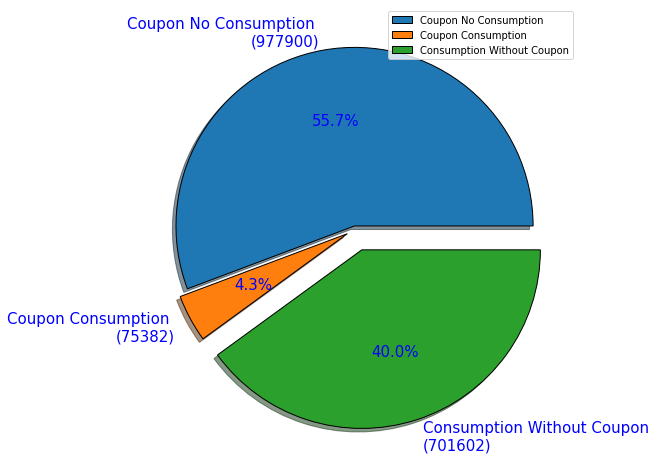

In [105]:
# pie chart of consumption
fx,ax=plt.subplots(1,1,figsize=(8,12))
consume_status.plot.pie(ax=ax,
                       autopct='%1.1f%%',
                       shadow=True,
                       explode=[0.02,0.05,0.12],
                       textprops={'fontsize':15,'color':'blue'},
                       wedgeprops={'linewidth':1,'edgecolor':'black'},
                       labels=['Coupon No Consumption \n({})'.format(len(cpon_no_consume)),
                              'Coupon Consumption \n({})'.format(len(cpon_consume)),
                              'Consumption Without Coupon \n({})'.format(len(no_cpon_consume))])
ax.set_ylabel('')
plt.legend(labels=['Coupon No Consumption', 'Coupon Consumption','Consumption Without Coupon'])
# ax.set_title('Pie Chart for Consume Status')

## 4. Data Analysis

### 4.1 relation between Coupon consumption and distance 

In [106]:
Merchant_distance=cpon_consume.groupby('Merchant_id')['Distance'].mean()
Merchant_distance
# there are 4076 merchants in the data

Merchant_id
3       0.000000
4       0.000000
5       1.000000
13      0.000000
14      0.000000
          ...   
8844    2.916667
8849    0.000000
8850    4.333333
8852         NaN
8856    0.000000
Name: Distance, Length: 4076, dtype: float64

In [107]:
Merchant_distance.value_counts()
# for custoemrs who redeemed coupon, 1431 out of 4076 were located within 500m

0.000000     1431
1.000000      266
2.000000      131
10.000000     130
3.000000      111
             ... 
0.272498        1
3.705882        1
0.370370        1
1.571429        1
2.916667        1
Name: Distance, Length: 514, dtype: int64

In [108]:
# discount rate investigation 
Merchant_discount_rate=cpon_consume.groupby('Merchant_id')['Discount_rate'].mean()
Merchant_discount_rate.sort_values()

Merchant_id
8124    0.20
4111    0.20
3557    0.20
21      0.33
6521    0.40
        ... 
1287    0.99
6031    0.99
4314    0.99
3287    0.99
6531    0.99
Name: Discount_rate, Length: 4076, dtype: float64

<AxesSubplot:>

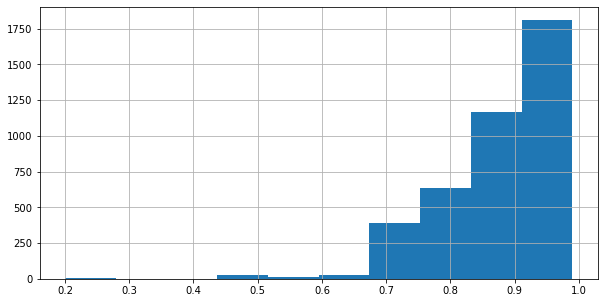

In [123]:
Merchant_discount_rate.hist(figsize=(10,5))

In [110]:
Merchant_discount_rate.mean()

0.8847410562670556

### Average discount of 4076 stores is 0.88 

In [119]:
most_popular_merchant=cpon_consume.groupby('Merchant_id')['Coupon_id'].count().sort_values(ascending=False)
most_popular_merchant[:10]

Merchant_id
5341    5653
760     3140
6485    3119
3381    2487
2099    1705
2934    1611
450     1461
4142    1403
7555    1353
3532    1315
Name: Coupon_id, dtype: int64

In [128]:
most_popular_merchant[:10].index

Int64Index([5341, 760, 6485, 3381, 2099, 2934, 450, 4142, 7555, 3532], dtype='int64', name='Merchant_id')

Text(0.5, 1.0, 'TOP 10 most popular coupon redeeming merchants')

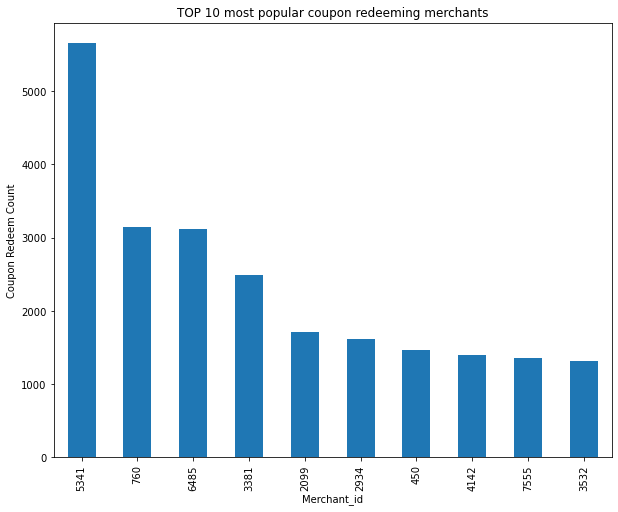

In [134]:
most_popular_merchant[:10].plot.bar(figsize=(10,8))
plt.ylabel('Coupon Redeem Count')
plt.title('TOP 10 most popular coupon redeeming merchants')

In [140]:
most_popular_merchant[:10].mean()

2324.7

### Insight: Top 10 merchants have an average 2324.7 coupon being redeemed 

In [137]:
cpon_consume_customer_ct=cpon_consume.groupby('Merchant_id')['User_id'].apply(lambda x:len(x.unique())).sort_values(ascending=False)
cpon_consume_customer_ct


Merchant_id
5341    2800
760     2627
3381    2248
6485    2029
2099    1401
        ... 
4227       1
4213       1
4209       1
4204       1
4439       1
Name: User_id, Length: 4076, dtype: int64

In [141]:
cpon_consume_customer_ct[:10].mean()

1627.2

### Insight: Top 10 merchants have an average 1627.2 coupon customers 

Text(0.5, 1.0, 'TOP 10 most popular coupon customers merchants')

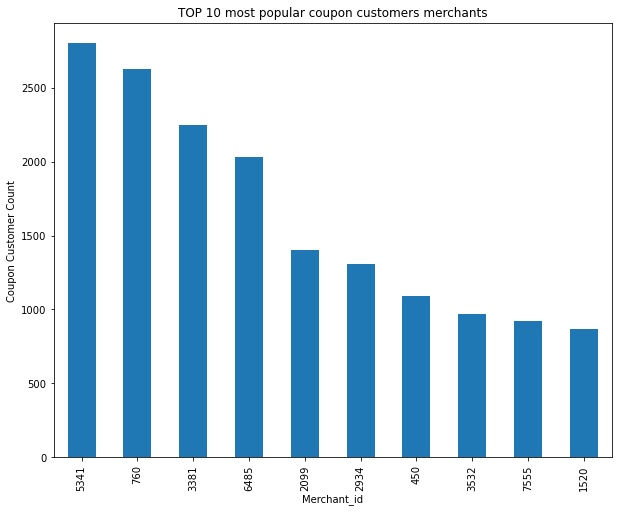

In [139]:
cpon_consume_customer_ct[:10].plot.bar(figsize=(10,8))
plt.ylabel('Coupon Customer Count')
plt.title('TOP 10 most popular coupon customers merchants')

### 4.2  Top 10 merchants and its distance and discount

In [147]:
merchant_pop_ds=pd.merge(left=cpon_consume_customer_ct[:16],right=Merchant_distance,on='Merchant_id',how='inner')

In [151]:
merchant_pop_ds_rate=pd.merge(left=merchant_pop_ds,right=Merchant_discount_rate,on='Merchant_id',how='inner')
merchant_pop_ds_rate.columns=['Coupon_Ct','Distance','Discount']
merchant_pop_ds_rate

,Coupon_Ct,Distance,Discount
Merchant_id,,,
5341,5653,0.168598,0.826036
760,3140,0.349866,0.799873
6485,3119,0.368567,0.770439
3381,2487,1.652429,0.744150
2099,1705,0.968072,0.900000
2934,1611,1.114833,0.830000
450,1461,0.892164,0.819274
4142,1403,0.555882,0.900000
7555,1353,1.329977,0.828381


### 4.3 correlation 

In [149]:
merchant_pop_ds_rate.corr()

,Coupon_Ct,Distance,Discount
Coupon_Ct,1.000000,-0.304492,-0.253195
Distance,-0.304492,1.000000,-0.125563
Discount,-0.253195,-0.125563,1.000000


In [155]:
merchant_pop_ds2=pd.merge(left=cpon_consume_customer_ct[:16],right=Merchant_distance,on='Merchant_id',how='inner')
merchant_pop_ds_rate2=pd.merge(left=merchant_pop_ds2,right=Merchant_discount_rate,on='Merchant_id',how='inner')
merchant_pop_ds_rate2.columns=['Customer_ct','Distance','Discount']
merchant_pop_ds_rate2

,Customer_ct,Distance,Discount
Merchant_id,,,
5341,2800,0.168598,0.826036
760,2627,0.349866,0.799873
3381,2248,1.652429,0.744150
6485,2029,0.368567,0.770439
2099,1401,0.968072,0.900000
2934,1310,1.114833,0.830000
450,1094,0.892164,0.819274
3532,968,0.272498,0.852289
7555,925,1.329977,0.828381


In [156]:
merchant_pop_ds_rate2.corr()

,Customer_ct,Distance,Discount
Customer_ct,1.000000,-0.306180,-0.204102
Distance,-0.306180,1.000000,-0.397376
Discount,-0.204102,-0.397376,1.000000


<AxesSubplot:>

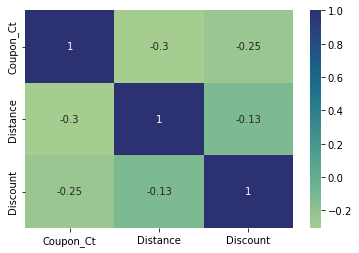

In [162]:
sns.heatmap(data=merchant_pop_ds_rate.corr(), cmap="crest",annot=True)

<AxesSubplot:>

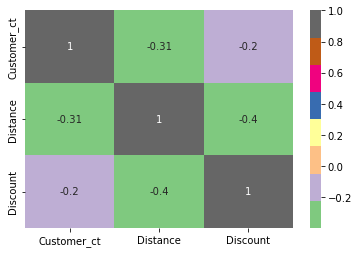

In [163]:
sns.heatmap(data=merchant_pop_ds_rate2.corr(), cmap="Accent",annot=True)

### Insight: Coupon redeem  and distance have a no-obvious negative relation, between 0.3 and 0.4
### Coupon redeem  and discount rate have a no-obvious negative relation, at 0.2-0.4

### 4.4 Daily Coupon dispatching and using

In [188]:
coupon_consume_everyday=cpon_consume.groupby('Date_received')['Coupon_id'].count()
coupon_consume_everyday

Date_received
2016-01-01     74
2016-01-02     67
2016-01-03     74
2016-01-04     98
2016-01-05    107
             ... 
2016-06-11    351
2016-06-12    330
2016-06-13    439
2016-06-14    394
2016-06-15    355
Name: Coupon_id, Length: 167, dtype: int64

In [185]:
coupon_dispatch_everyday=data.groupby('Date_received')['Coupon_id'].count()
coupon_dispatch_everyday

Date_received
2016-01-01     554
2016-01-02     542
2016-01-03     536
2016-01-04     577
2016-01-05     691
              ... 
2016-06-11    5211
2016-06-12    4005
2016-06-13    7861
2016-06-14    4755
2016-06-15    3475
Name: Coupon_id, Length: 167, dtype: int64

In [184]:
data[data['Date_received'].notnull()][['Date_received','User_id']].groupby('Date_received').count()[:30]

,User_id
Date_received,
2016-01-01,554
2016-01-02,542
2016-01-03,536
2016-01-04,577
2016-01-05,691
2016-01-06,808
2016-01-07,746
2016-01-08,970
2016-01-09,1003


In [175]:
coupon_dispatch_using=pd.merge(left=coupon_consume_everyday,right=coupon_dispatch_everyday,on='Date_received',how='inner')
coupon_dispatch_using.columns=['coupon_dispatch_day','coupon_use_day']
coupon_dispatch_using.corr()

,coupon_dispatch_day,coupon_use_day
coupon_dispatch_day,1.000000,0.613009
coupon_use_day,0.613009,1.000000


### Insight: There is a relatively positive correlation between coupon dispatching and coupon using. A higher amount of coupon dispatching results on higher rate of coupon redeeming

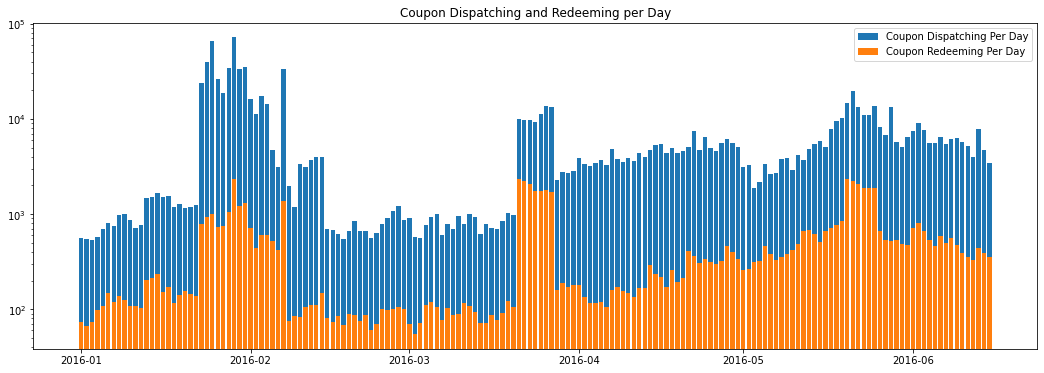

In [192]:
# Data visulziation 
plt.figure(figsize=(18,6))
plt.bar(x=coupon_dispatch_everyday.index,height=coupon_dispatch_everyday.values,label='Coupon Dispatching Per Day')
plt.bar(x=coupon_consume_everyday.index,height=coupon_consume_everyday.values,label='Coupon Redeeming Per Day')
plt.title('Coupon Dispatching and Redeeming per Day')
plt.yscale('log')
plt.legend()

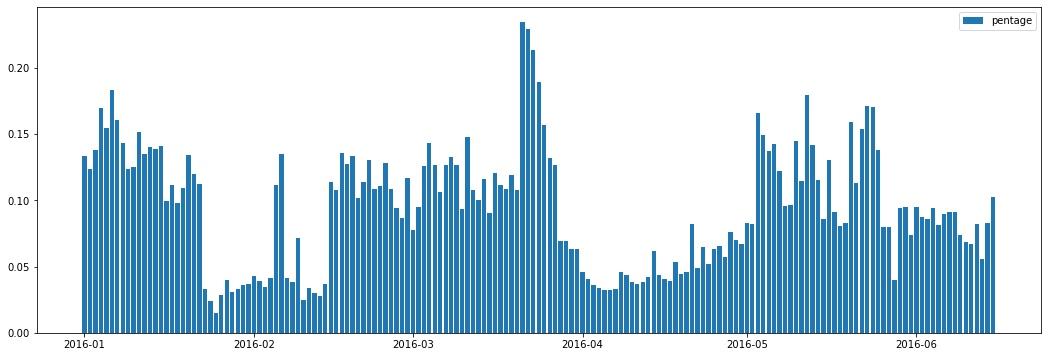

In [194]:
plt.figure(figsize=(18,6))
plt.bar(x=coupon_dispatch_everyday.index,height=coupon_consume_everyday.values/coupon_dispatch_everyday.values,label='pentage'
       )
plt.legend()

### Insight: Coupon redeeming rate has a wide range from 0.02 to 0.25. April 2016 logged the highest coupon redeeming rate 